Logistic regression is a classification model. It predicts whether $\mathbf{x}$ belongs to positive case or not. It does so by using sigmoid function in composition with linear equation:
$$h(x) = \frac{1}{1 + e^{\mathbf{x}^{\intercal}\mathbf{\theta}}}$$
$$y = \left\{
  \begin{array}{ c l }
    1 & \quad h(x) \geq 0.5 \\
    0 & \quad \textrm{otherwise}
  \end{array}
\right.$$

The subject of learning is to minimize:

$$\textrm{cost}(h(x), y)=\left\{
  \begin{array}{ c l }
    -\log(h(x)) & \quad y = 1 \\
    -\log(1-h(x)) & \quad y = 0
  \end{array}
\right.$$

Can be rewritten as:

$$\textrm{cost}(h(x), y)=-y\log(h(x))-(1 - y)\log(1-h(x))$$

Derivative:

$$ \frac{d}{d\mathbf{\theta}}J(\mathbf{\theta})=\frac{1}{m}\mathbf{X}^{\intercal}(h(x) - \mathbf{y}) $$

In [104]:

import numpy as np


def cost(hx: np.array, y: np.array):
    return np.sum(np.log(hx) * -1 * y - (1 - y) * np.log(1 - hx)) * (1 / hx.shape[0])


def learn(X: np.ndarray, y: np.ndarray, total_epoches=10, lr=1):
    Xb: np.ndarray = np.column_stack([np.ones([X.shape[0], 1]), X])

    theta = np.ones(Xb.shape[1])
    history = []
    for epoch in range(0, total_epoches):
        history.append(cost(predict(X, theta), y))
        theta = theta - lr * Xb.transpose().dot(predict(X, theta) - y)

    return theta, history


def predict(X: np.ndarray, theta: np.ndarray):
    Xb: np.ndarray = np.column_stack([np.ones([X.shape[0], 1]), X])

    return np.reciprocal(1 + np.exp(Xb.dot(theta) * -1))


Let's try fitting non-linear classification problem using linear features

0.2435186304531812

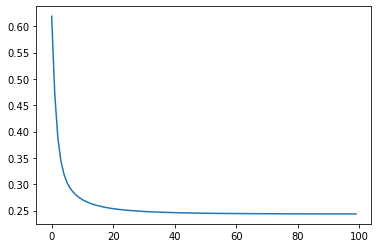

In [105]:
from sklearn import datasets

np.random.seed(13)
X, y = datasets.make_classification(100, 2, n_redundant=0)

theta, history = learn(X, y, 100, 0.01)

plt.plot(np.arange(0, len(history)), history)
cost(predict(X, theta), y)

Add extra features to make $\mathbf{x}^{\intercal}\mathbf{\theta}$ non-linear, e. g. transform to $\theta_0 + \theta_1{x_1} + \theta_2{x_2} + {x_3}^2\theta_3$ terms

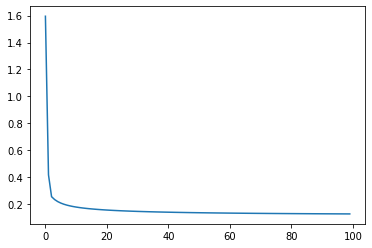

In [107]:
def extend(X: np.array):
    return np.column_stack([X, np.square(X[:, 0])])

theta, history = learn(extend(X), y, 100, 0.01)

plt.plot(np.arange(0, len(history)), history)

In [108]:
cost(predict(extend(X), theta), y)

0.12625766607162675

In [ ]:
def show(X: np.linspace, y: np.linspace, theta: np.array, prepare=lambda x: x):
    delta = 5
    x = np.linspace(-5, 5, delta)
    x1, x2 = np.meshgrid(x, x)
    joined = np.column_stack([x1.reshape([-1, 1]), x2.reshape([-1, 1])])

    plt.contourf(x1, x2, predict(prepare(joined), theta).reshape([-1, 5]), 10, cmap='RdGy')
    plt.colorbar()

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='GnBu_r')

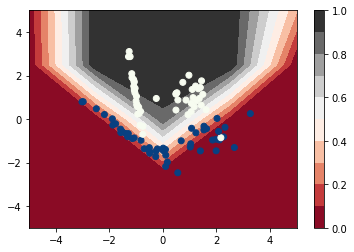

In [109]:
show(extend(X), y, theta, extend)